The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

Reading the dataset
Shape of the dataset
Columns in the Dataset

In [4]:
df = pd.read_csv("bike_sharing.csv")
df.shape


(10886, 12)

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


Datatypes

In [10]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Null Values ?

In [11]:
np.any(df.isna())

False

Duplicate Values ?

In [12]:
np.any(df.duplicated())

False

Converting the datatype of datetime column from object to datetime


In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])

Max , MIN and Delta Time Period

In [14]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [15]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [16]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

In [17]:
df['day'] = df['datetime'].dt.day_name()

In [18]:
df.set_index('datetime', inplace = True)

Slicing Date by Time

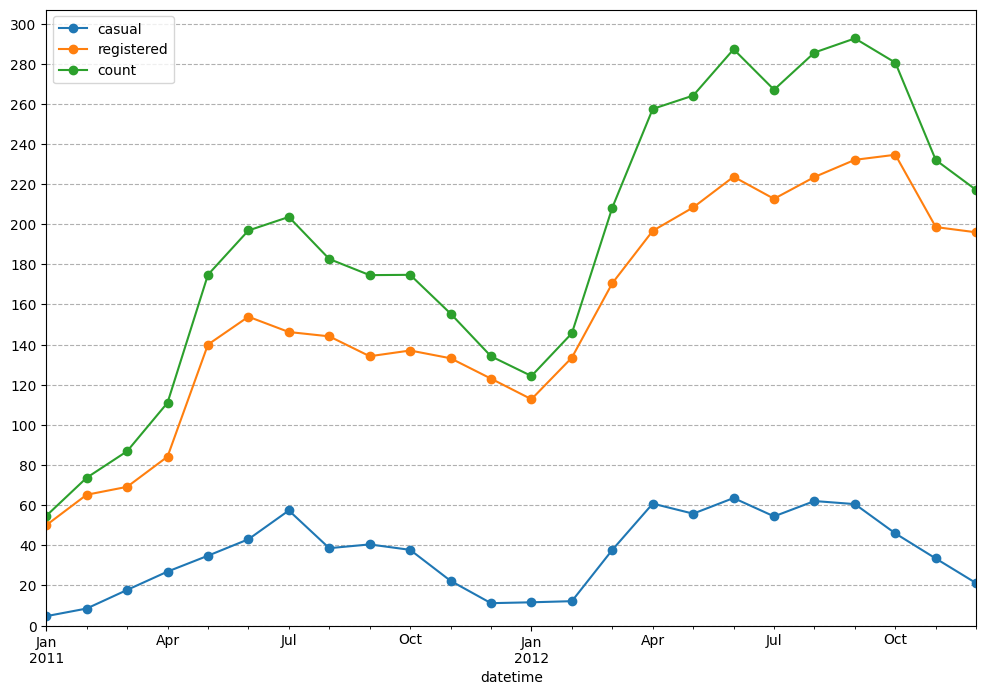

In [19]:
plt.figure(figsize = (12, 8))

df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)
plt.show()

Average Tread monthy sales and Sale Values

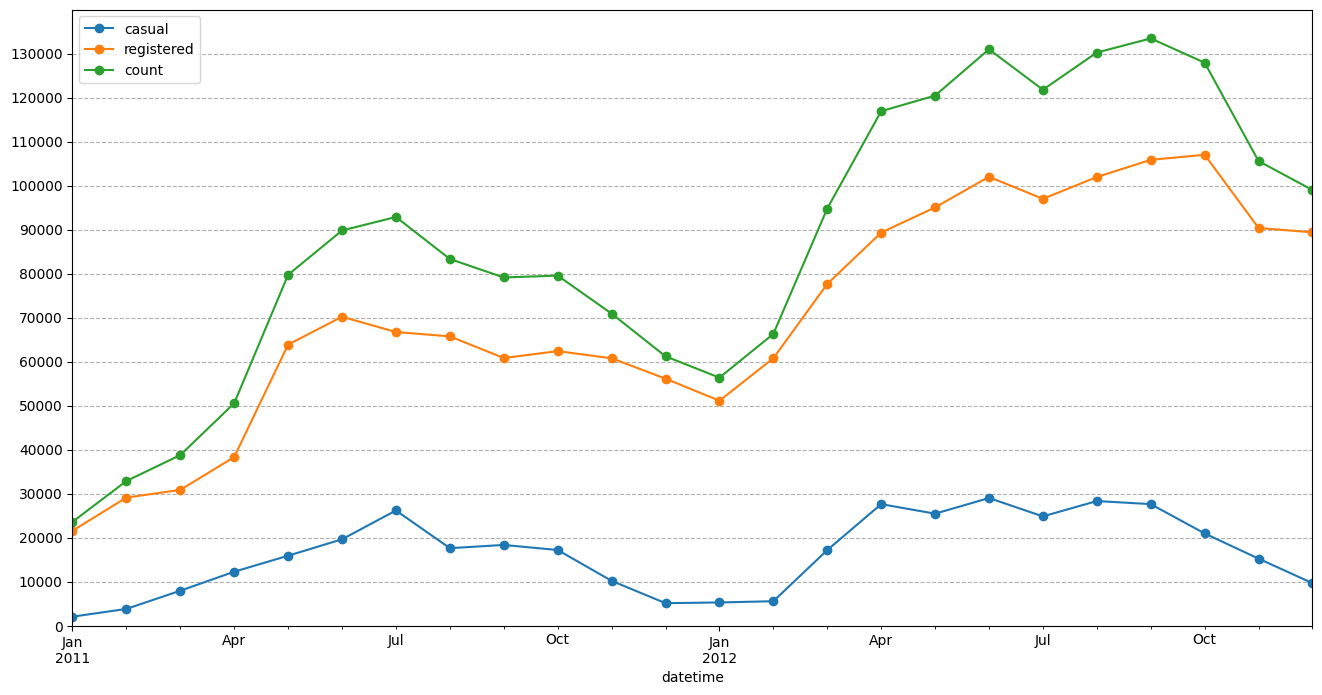

In [20]:
plt.figure(figsize = (16, 8))

df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)
plt.show()

I want to know if there is an increase in the average hourly count of rental bikes from the year 2011 to 2012

In [21]:
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()

df1['prev_count'] = df1['count'].shift(1)

df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


In [22]:
df.reset_index(inplace = True)

 Month Wise Breakup or Trends of average hourly count of rental bikes

In [23]:
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)


df1['prev_count'] = df1['count'].shift(1)


df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


[]

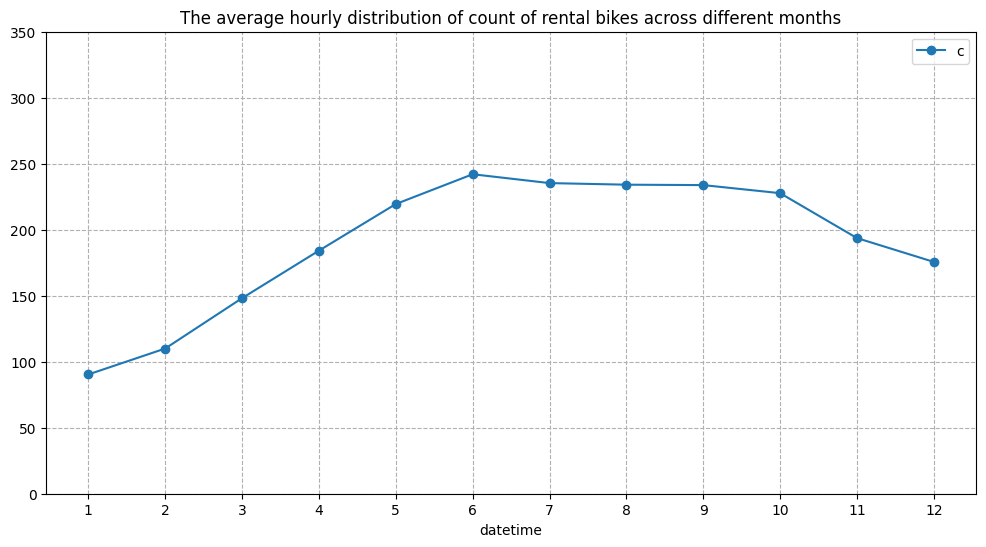

In [24]:
plt.figure(figsize = (12, 6))

plt.title("The average hourly distribution of count of rental bikes across different months")

df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')

plt.ylim(0,)
plt.xticks(np.arange(1, 13))
plt.legend('count')
plt.yticks(np.arange(0, 400, 50))

plt.grid(axis = 'both', linestyle = '--')
plt.plot()

Day Wise Breakup or Trends of average hourly count of rental bikes

In [25]:
df1 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)

df1['prev_count'] = df1['count'].shift(1)

df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1

,count,prev_count,growth_percent
hour,,,
0,55.138462,NaN,NaN
1,33.859031,55.138462,-38.592718
2,22.899554,33.859031,-32.367959
3,11.757506,22.899554,-48.656179
4,6.407240,11.757506,-45.505110
5,19.767699,6.407240,208.521293
6,76.259341,19.767699,285.777526
7,213.116484,76.259341,179.462793
8,362.769231,213.116484,70.221104


[]

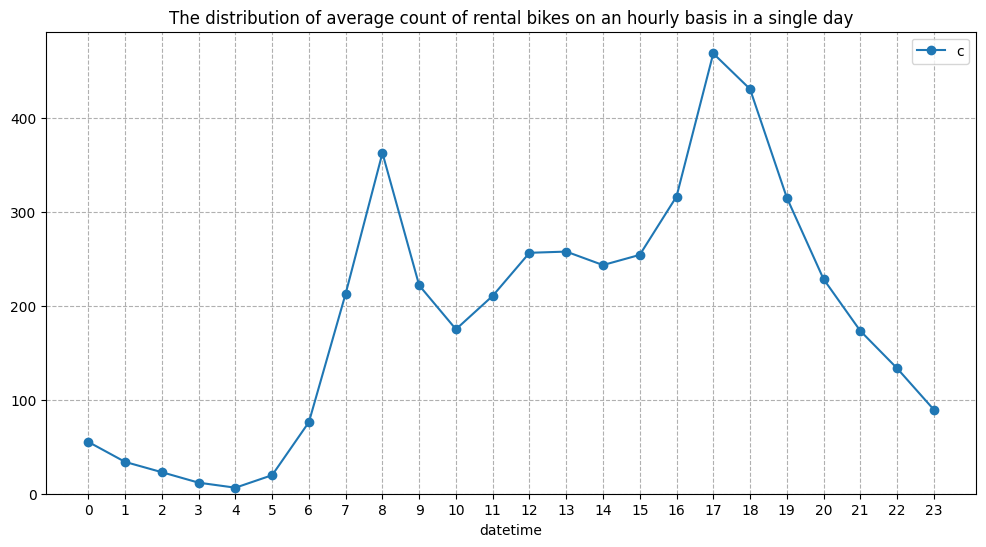

In [27]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [27]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

Updating dtype of season column

In [28]:
print('Memory usage of season column : ', df['season'].memory_usage())
df['season'] = df['season'].astype('category')
print('Updated Memory usage of season column : ', df['season'].memory_usage())

Memory usage of season column :  87216
Updated Memory usage of season column :  11218


Updating dtype of holiday column

In [29]:
print('Max value entry in holiday column : ', df['holiday'].max())
print('Memory usage of holiday column : ', df['holiday'].memory_usage())
df['holiday'] = df['holiday'].astype('category')
print('Updated Memory usage of holiday column : ', df['holiday'].memory_usage())

Max value entry in holiday column :  1
Memory usage of holiday column :  87216
Updated Memory usage of holiday column :  11138


Updating dtype of workingday column

In [30]:
print('Max value entry in workingday column : ', df['workingday'].max())
print('Memory usage of workingday column : ', df['workingday'].memory_usage())

df['workingday'] = df['workingday'].astype('category')
print('Updated Memory usage of workingday column : ', df['workingday'].memory_usage())

Max value entry in workingday column :  1
Memory usage of workingday column :  87216
Updated Memory usage of workingday column :  11138


Updating dtype of weather column

In [33]:
print('Max value entry in weather column : ', df['weather'].max())
print('Memory usage of weather column : ', df['weather'].memory_usage())
df['weather'] = df['weather'].astype('category')
print('Updated Memory usage of weather column : ', df['weather'].memory_usage())

Max value entry in weather column :  4
Memory usage of weather column :  87216
Updated Memory usage of weather column :  11218


Updating dtype of temp column

In [31]:
print('Max value entry in temp column : ', df['temp'].max())
print('Memory usage of temp column : ', df['temp'].memory_usage())
# Since the maximum entry in temp column is 41.0 and the dtype is float64, we can convert the dtype to float32 to save memory
df['temp'] = df['temp'].astype('float32')
print('Updated Memory usage of temp column : ', df['temp'].memory_usage())

Max value entry in temp column :  41.0
Memory usage of temp column :  87216
Updated Memory usage of temp column :  43672


Updating dtype of atemp column

In [32]:
print('Max value entry in atemp column : ', df['atemp'].max())
print('Memory usage of atemp column : ', df['atemp'].memory_usage())
df['atemp'] = df['atemp'].astype('float32')
print('Updated Memory usage of atemp column : ', df['atemp'].memory_usage())

Max value entry in atemp column :  45.455
Memory usage of atemp column :  87216
Updated Memory usage of atemp column :  43672


Updating dtype of humidity column

In [33]:
print('Max value entry in humidity column : ', df['humidity'].max())
print('Memory usage of humidity column : ', df['temp'].memory_usage())
df['humidity'] = df['humidity'].astype('int8')
print('Updated Memory usage of humidity column : ', df['humidity'].memory_usage())

Max value entry in humidity column :  100
Memory usage of humidity column :  43672
Updated Memory usage of humidity column :  11014


Updating dtype of windspeed column

In [34]:
print('Max value entry in windspeed column : ', df['windspeed'].max())
print('Memory usage of windspeed column : ', df['windspeed'].memory_usage())
df['windspeed'] = df['windspeed'].astype('float32')
print('Updated Memory usage of windspeed column : ', df['windspeed'].memory_usage())

Max value entry in windspeed column :  56.9969
Memory usage of windspeed column :  87216
Updated Memory usage of windspeed column :  43672


In [35]:
Updating dtype of casual column

SyntaxError: invalid syntax (<ipython-input-35-03a62043aa5f>, line 1)

In [36]:
print('Max value entry in casual column : ', df['casual'].max())
print('Memory usage of casual column : ', df['casual'].memory_usage())
df['casual'] = df['casual'].astype('int16')
print('Updated Memory usage of casual column : ', df['casual'].memory_usage())

Max value entry in casual column :  367
Memory usage of casual column :  87216
Updated Memory usage of casual column :  21900


Updating dtype of registered column

In [37]:
print('Max value entry in count column : ', df['count'].max())
print('Memory usage of count column : ', df['count'].memory_usage())
df['count'] = df['count'].astype('int16')
print('Updated Memory usage of count column : ', df['count'].memory_usage())

Max value entry in count column :  977
Memory usage of count column :  87216
Updated Memory usage of count column :  21900


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int8          
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int16         
 12  day         10886 non-null  object        
dtypes: category(3), datetime64[ns](1), float32(3), int16(2), int64(2), int8(1), object(1)
memory usage: 553.4+ KB


In [39]:
df.describe()

,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,1.418427,20.230862,23.655085,61.886460,12.799396,36.021955,155.552177,191.574132
std,0.633839,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2.000000,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000


In [40]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

winter    25.11
fall      25.11
summer    25.11
spring    24.67
Name: season, dtype: float64

In [41]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [42]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

1    68.09
0    31.91
Name: workingday, dtype: float64

In [43]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

Distribution by Season , Weather Etc.

[]

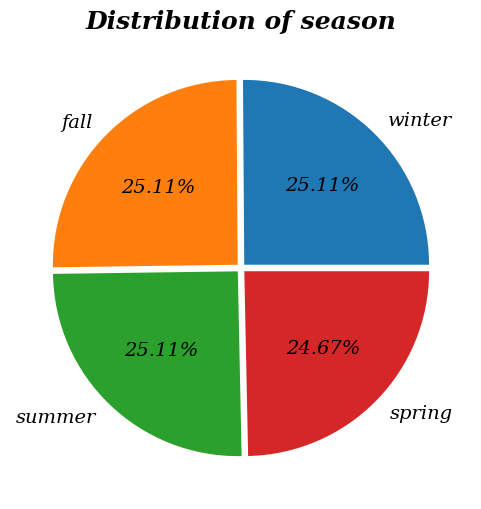

In [44]:
plt.figure(figsize = (6, 6))      # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of season', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_season['season'],
        explode = [0.025, 0.025, 0.025, 0.025],
        labels = df_season.index,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()     # displaying the plot

[]

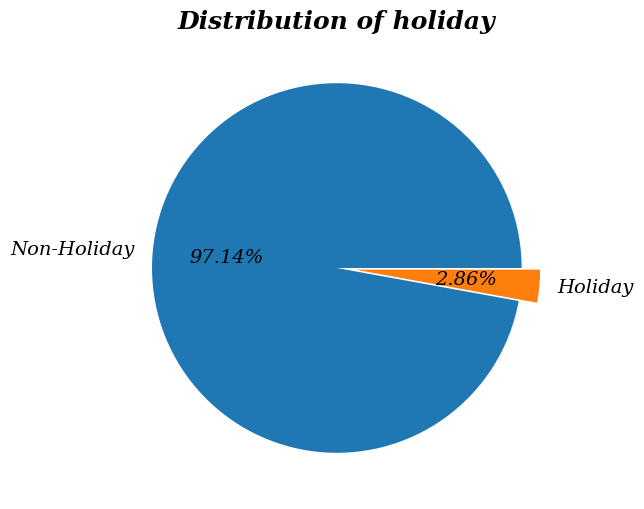

In [45]:
plt.figure(figsize = (6, 6))     # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of holiday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_holiday['holiday'],
        explode = [0, 0.1],
        labels = ['Non-Holiday', 'Holiday'],
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()        # displaying the plot

[]

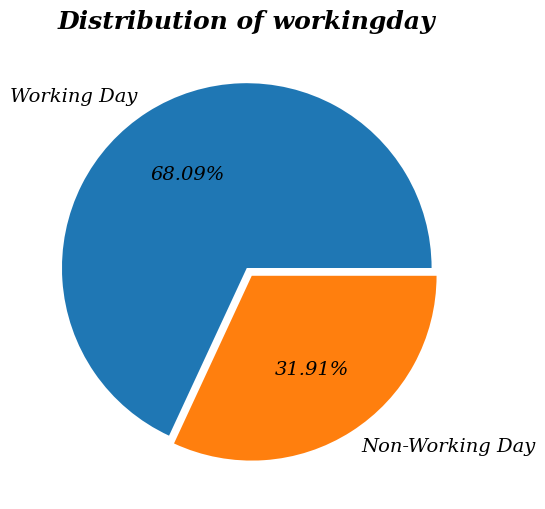

In [46]:
plt.figure(figsize = (6, 6))    # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of workingday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_workingday = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_workingday['workingday'],
        explode = [0, 0.05],
        labels = ['Working Day', 'Non-Working Day'],
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()         # displaying the plot

[]

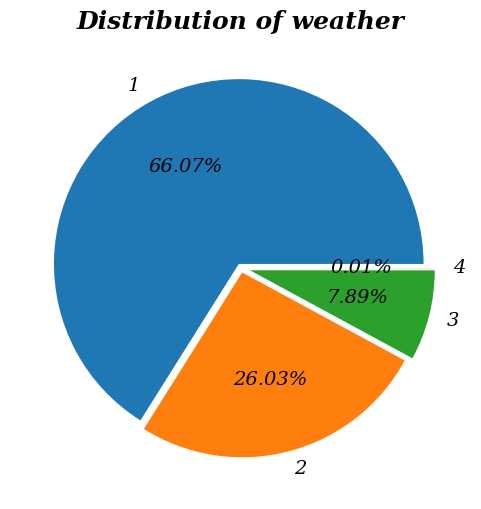

In [47]:
plt.figure(figsize = (6, 6))     # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of weather', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_weather['weather'],
        explode = [0.025, 0.025, 0.05, 0.05],
        labels = df_weather.index,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()        # displaying the plot

Univariate Analysis

[]

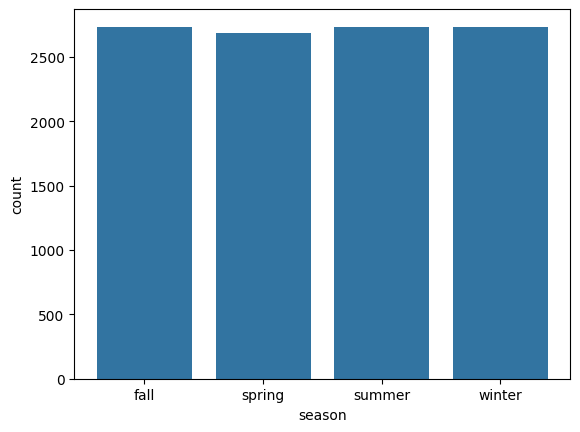

In [48]:

sns.countplot(data = df, x = 'season')
plt.plot()   # displaying the plot

[]

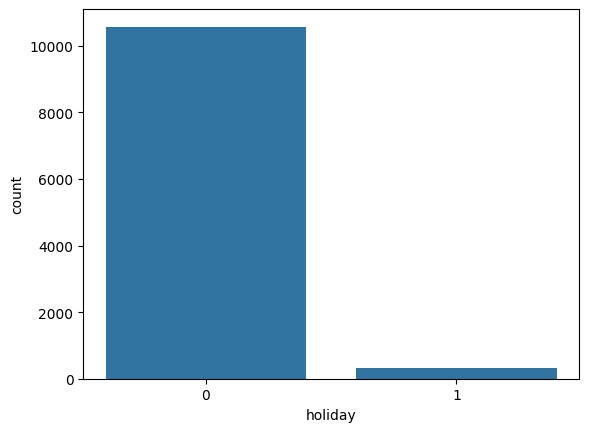

In [49]:

sns.countplot(data = df, x = 'holiday')
plt.plot()       # displaying the chart

[]

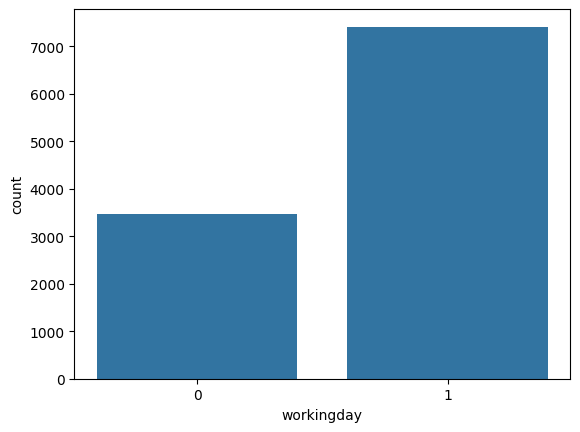

In [50]:
sns.countplot(data = df, x = 'workingday')
plt.plot()      # displaying the chart

[]

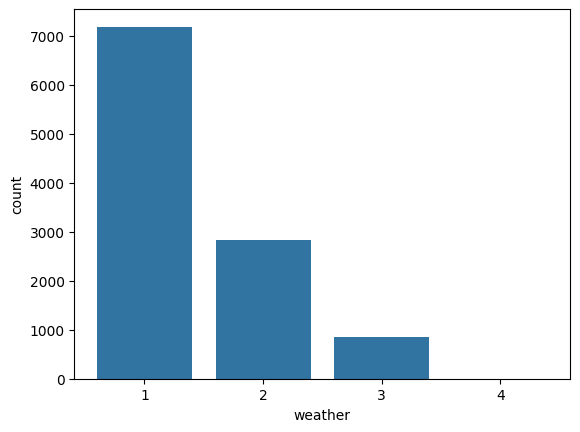

In [51]:
sns.countplot(data = df, x = 'weather')
plt.plot()        # displaying the chart

[]

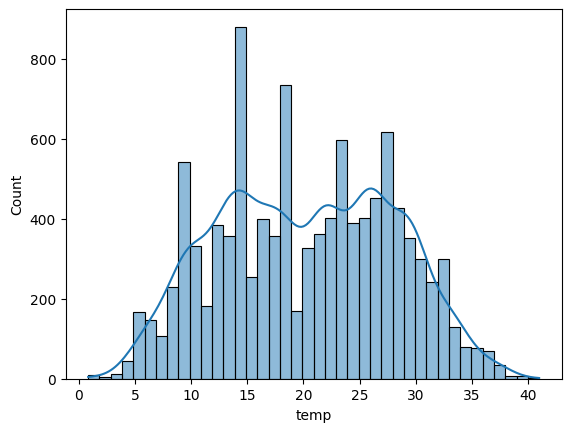

In [52]:
sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()        # displaying the chart

In [53]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

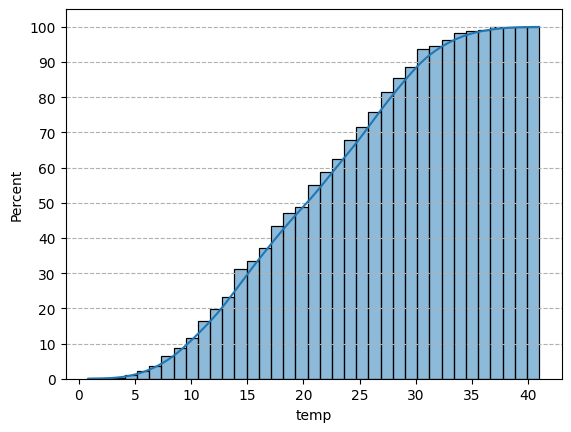

In [54]:
sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()          # displaying the chart

[]

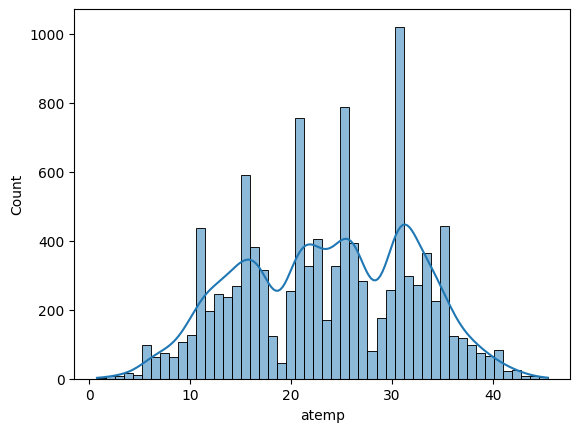

In [55]:
sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()         # displaying the chart

In [56]:
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std

(23.66, 8.47)

The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

[]

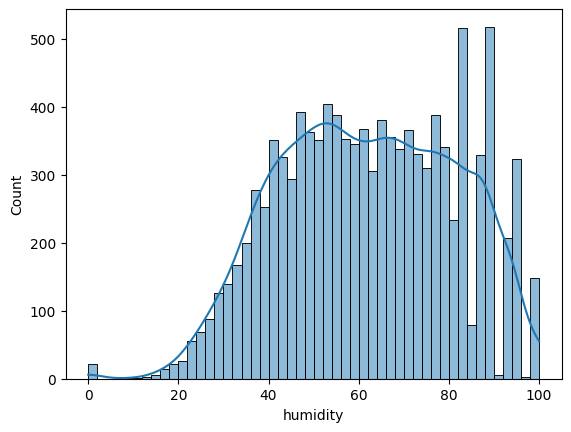

In [57]:
sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()       # displaying the chart

In [58]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)

The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

[]

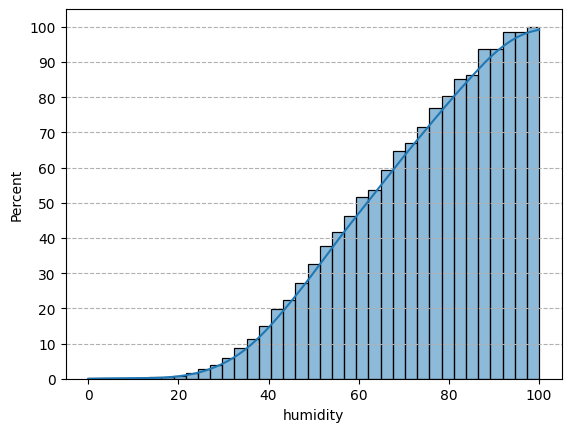

In [59]:
sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

[]

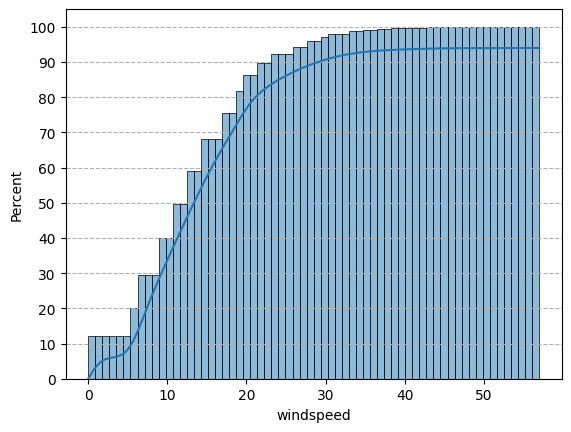

In [60]:
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

More than 85 % of the total windspeed data has a value of less than 20.

In [61]:
len(df[df['windspeed'] < 20]) / len(df)

0.8626676465184641

[]

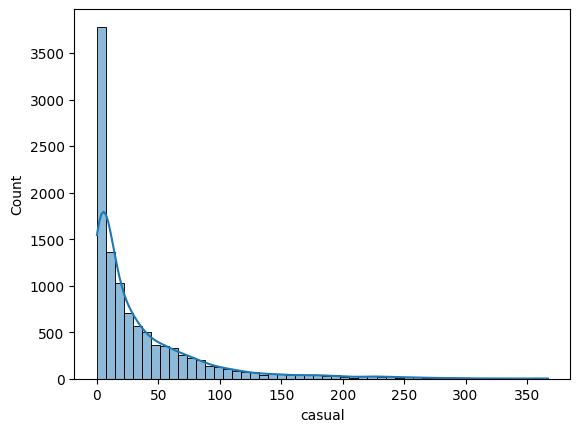

In [62]:
sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.plot()      # displaying the chart

[]

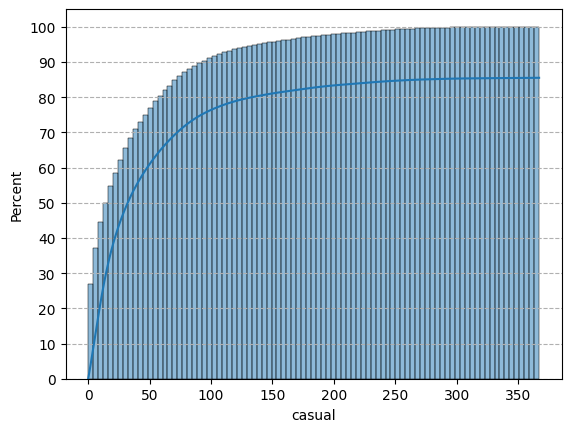

In [63]:
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        # displaying the chart

[]

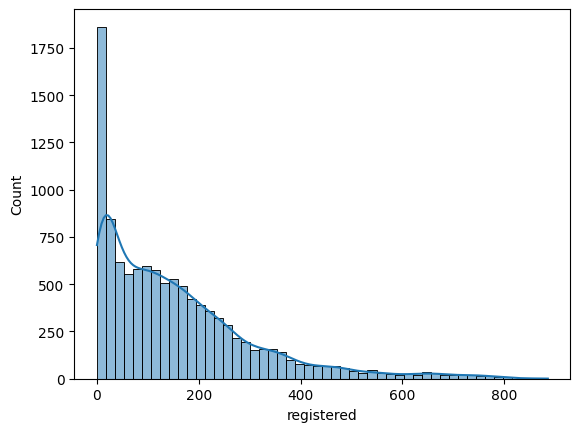

In [64]:
sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.plot()          # displaying the chart

[]

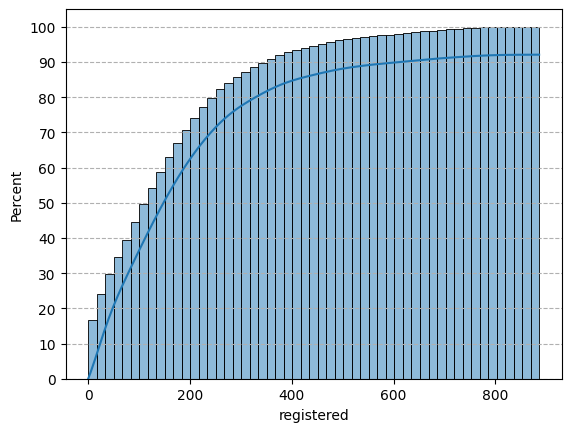

In [65]:
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        # displaying the chart

Outliers Detection

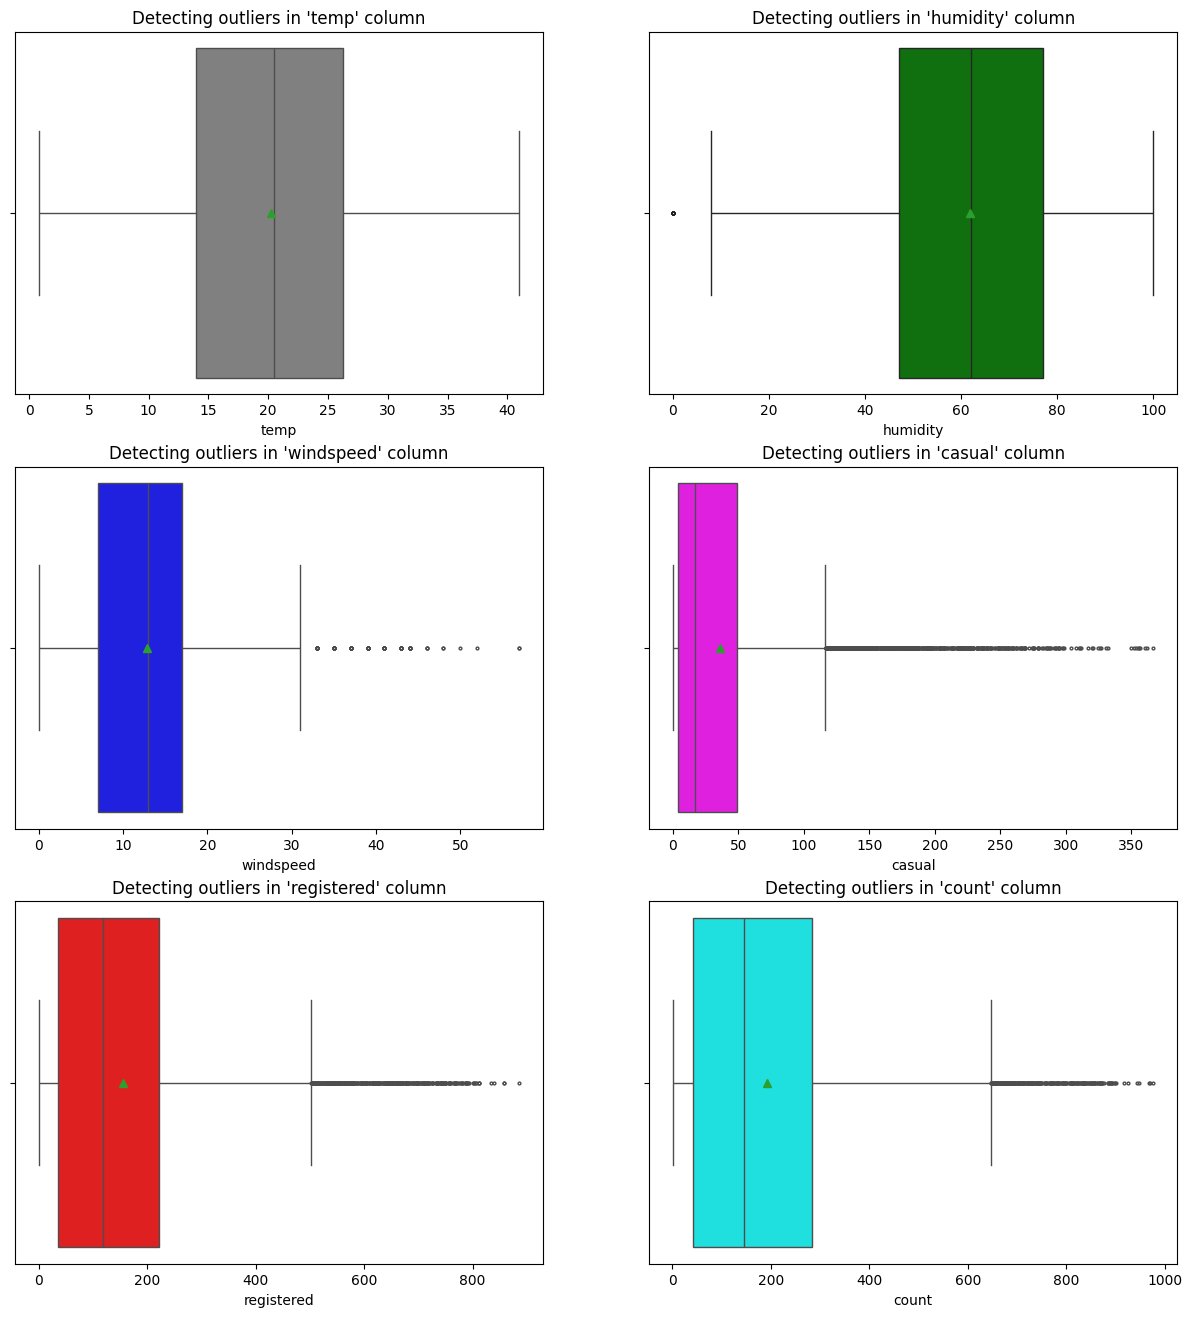

In [66]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

BIVARIATE Analysis

[]

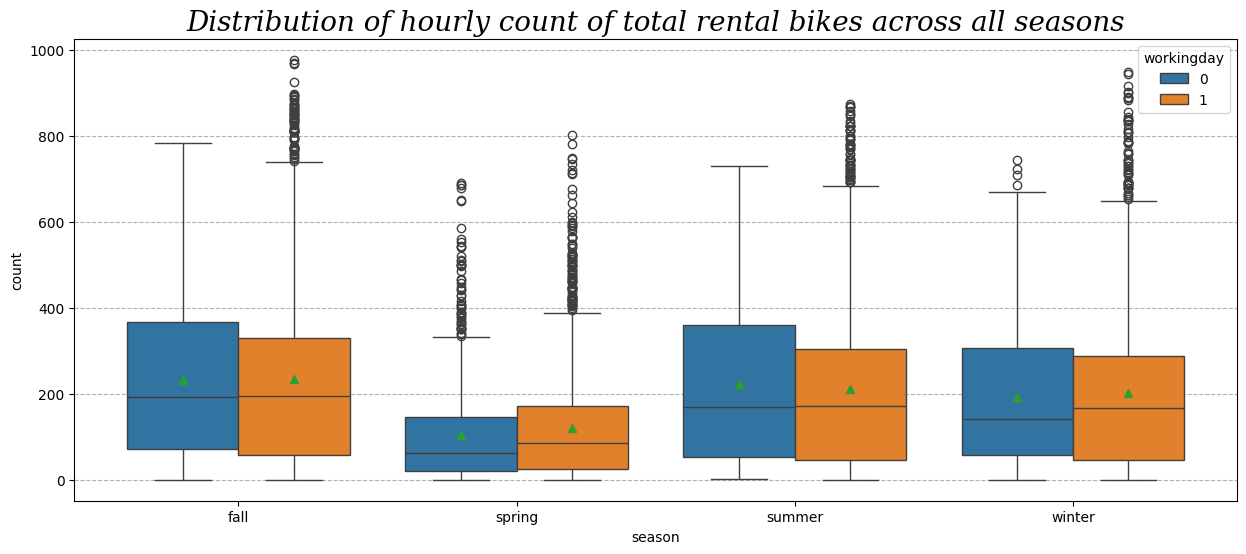

In [67]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

effect of Working Day on the number of electric cycles rented

In [68]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

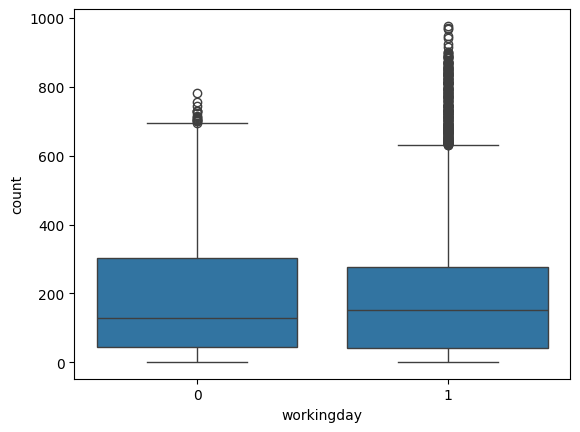

In [69]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Working Day does not have any effect on the number of electric cycles rented.

Alternate Hypothesis ( HA ) - Working Day has some effect on the number of electric cycles rented

STEP-2 : Checking for basic assumpitons for the hypothesis

Distribution check using QQ Plot
Homogeneity of Variances using Levene's test
STEP-3: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.
STEP-4: Compute the p-value and fix value of alpha.

We set our alpha to be 0.05
STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

[]

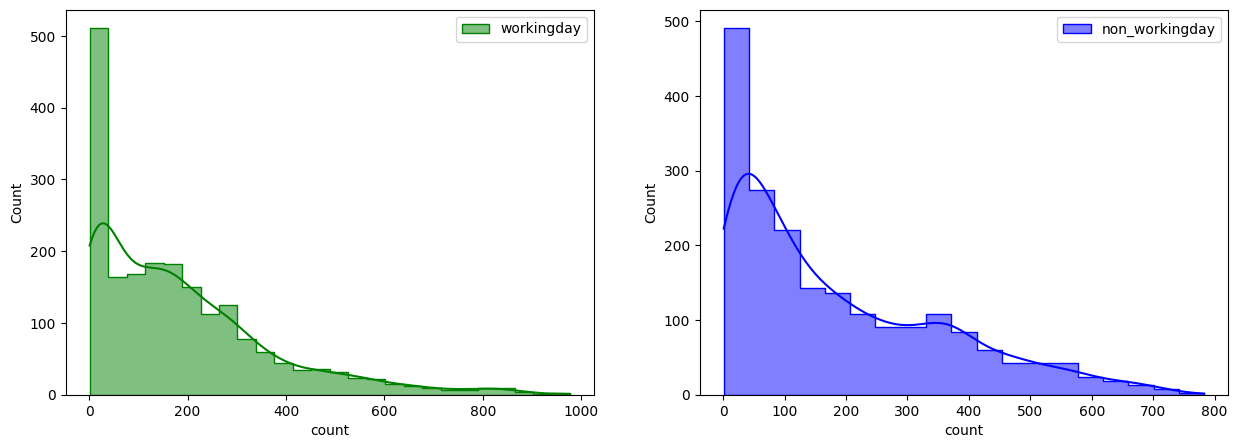

In [70]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

[]

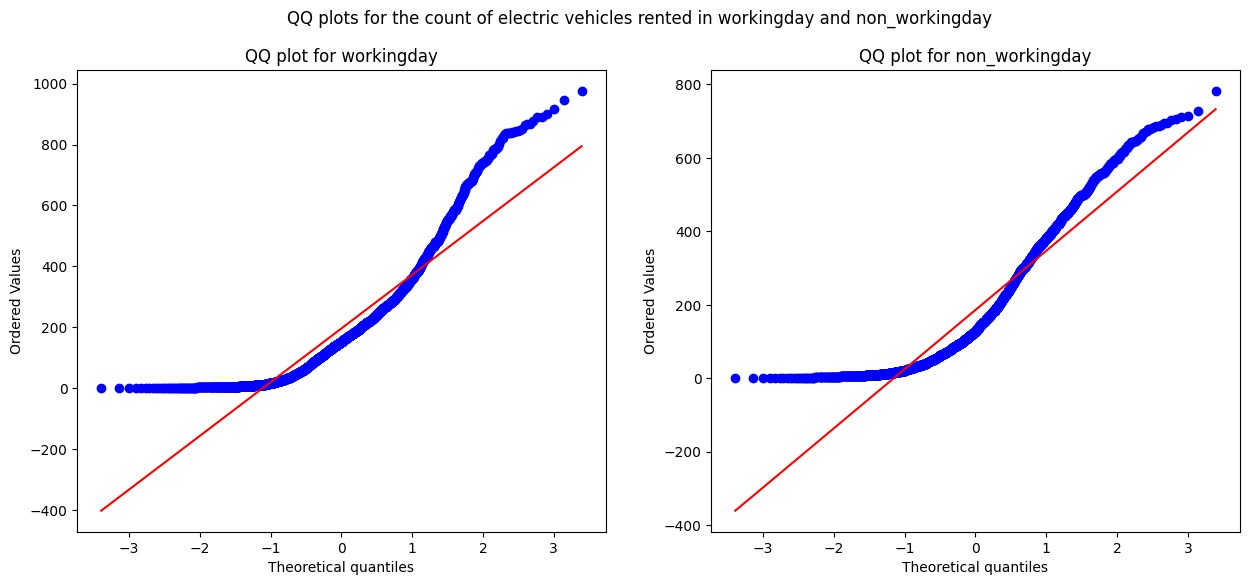

In [71]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()


 HO: The sample follows normal distribution
 Ha: The sample does not follow normal distribution

In [72]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.042777113448646e-38
The sample does not follow normal distribution


In [73]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.207867690659663e-36
The sample does not follow normal distribution


In [74]:
transformed_workingday = spy.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6136246052607705e-33
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [76]:
transformed_non_workingday = spy.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_non_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6136246052607705e-33
The sample does not follow normal distribution


In [77]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.3947466305899108
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here

In [78]:
test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'],
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


effect of holidays on the number of electric cycles rented

In [ ]:
effect of holidays on the number of electric cycles rented

In [79]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

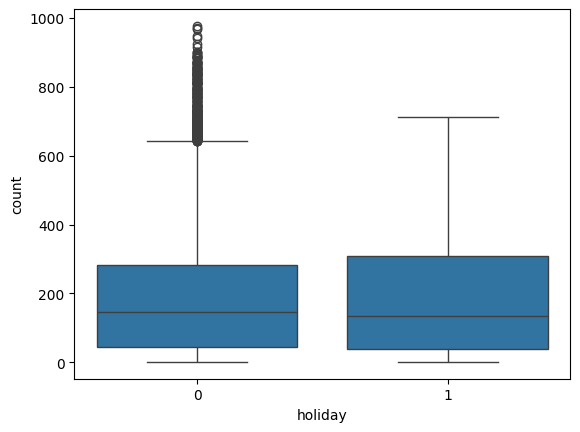

In [80]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Holidays have no effect on the number of electric vehicles rented

Alternate Hypothesis ( HA ) - Holidays has some effect on the number of electric vehicles rented

STEP-2 : Checking for basic assumpitons for the hypothesis

Distribution check using QQ Plot
Homogeneity of Variances using Levene's test
STEP-3: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.
STEP-4: Compute the p-value and fix value of alpha.

We set our alpha to be 0.05
STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0
Visual Tests to know if the samples follow normal distribution

[]

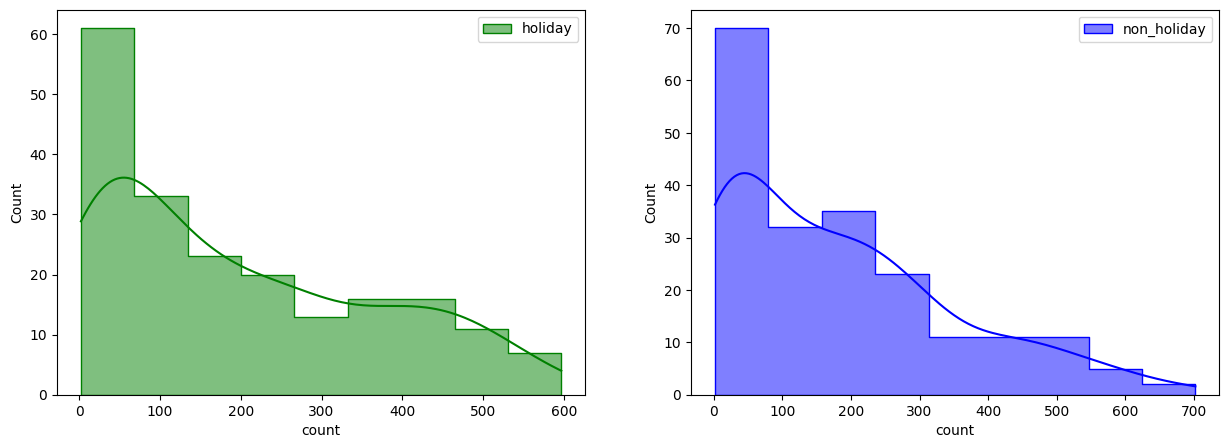

In [81]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200),
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200),
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.plot()

Distribution check using QQ Plot

[]

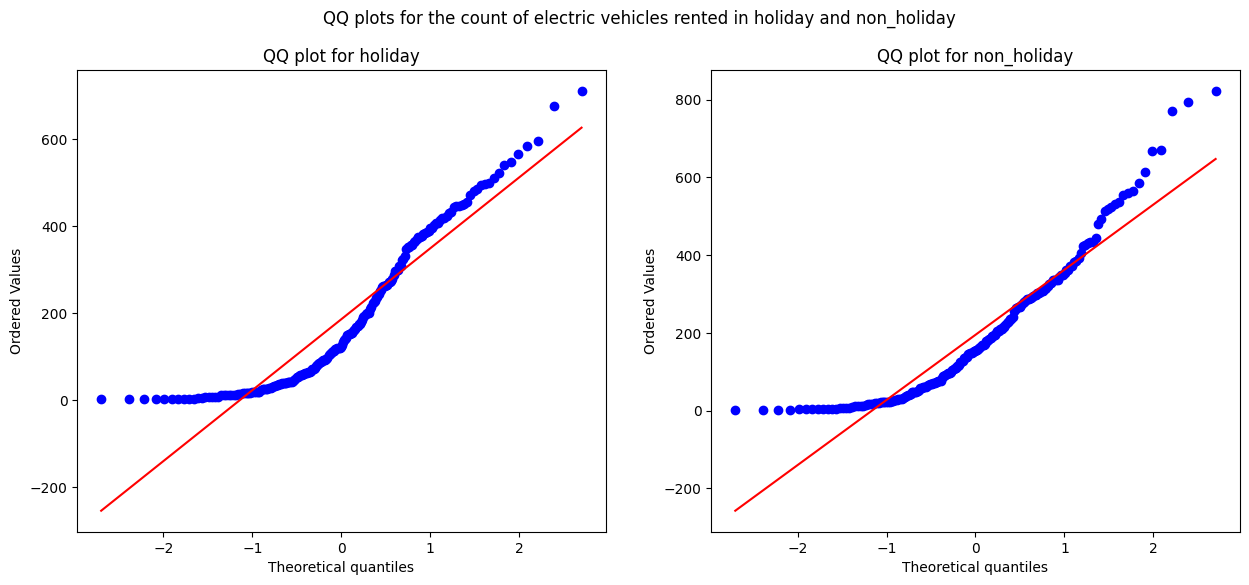

In [82]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.plot()

 H0: The sample follows normal distribution
 Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [83]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.8333215074404237e-11
The sample does not follow normal distribution


In [84]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.345658389746319e-11
The sample does not follow normal distribution


Homogeneity of Variances using Levene's test

In [85]:
test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.25943415837244327
The samples have Homogenous Variance 


In [86]:
test_stat, p_value = spy.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.43552836921315086
No.of electric cycles rented is similar for holidays and non-holidays


weather dependent on the season ?

In [87]:
df[['weather', 'season']].describe()

,weather
count,10886.000000
mean,1.418427
std,0.633839
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.
STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - weather is independent of season

Alternate Hypothesis ( HA ) - weather is dependent of seasons.

STEP-2: Define Test statistics

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

STEP-3: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

The data in the cells should be frequencies, or counts of cases.
The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
There are 2 variables, and both are measured as categories.
The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).
STEP-4: Compute the p-value and fix value of alpha.

we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05

STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0
The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.

In [88]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
fall,470116,139386,31160,0
spring,223009,76406,12919,164
summer,426350,134177,27755,0
winter,356588,157191,30255,0


In [89]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[470116, 139386,  31160],
       [223009,  76406,  12919],
       [426350, 134177,  27755],
       [356588, 157191,  30255]])

In [90]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[453484.88557396 155812.72247031  31364.39195574]
 [221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [92]:
alpha = 0.05
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


number of cycles rented is similar or different in different weather ?

In [93]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

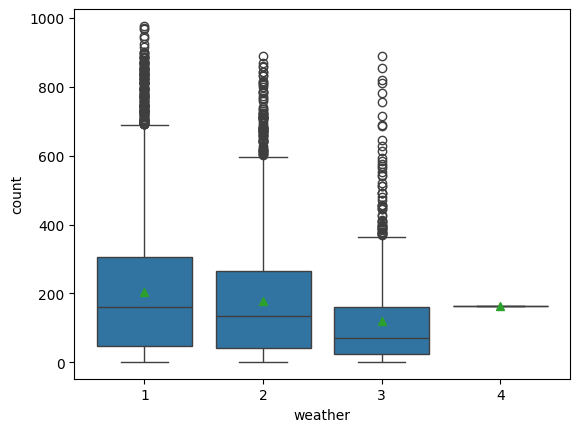

In [94]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

In [108]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

STEP-2 : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

STEP-3: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB / MSW

Under H0, the test statistic should follow F-Distribution.

STEP-4: Decide the kind of test.

We will be performing right tailed f-test

STEP-5: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0
Visual Tests to know if the samples follow normal distribution

[]

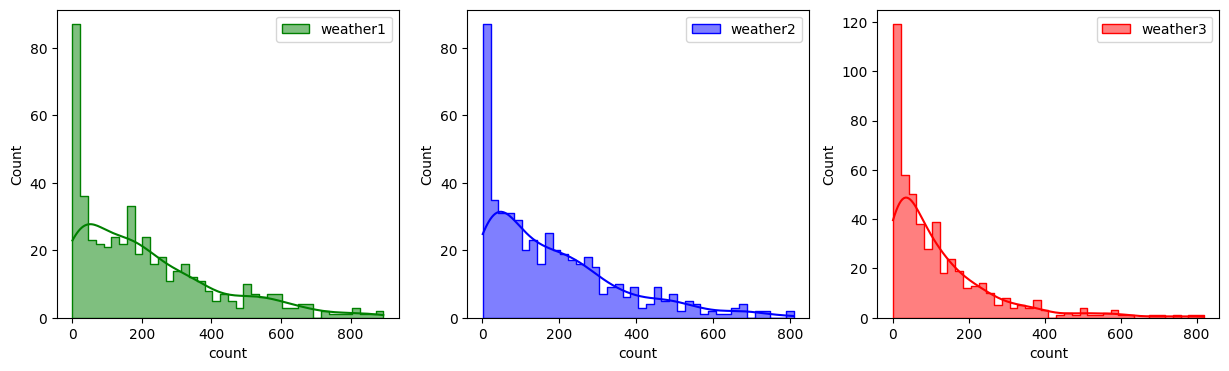

In [109]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

Distribution check using QQ Plot

[]

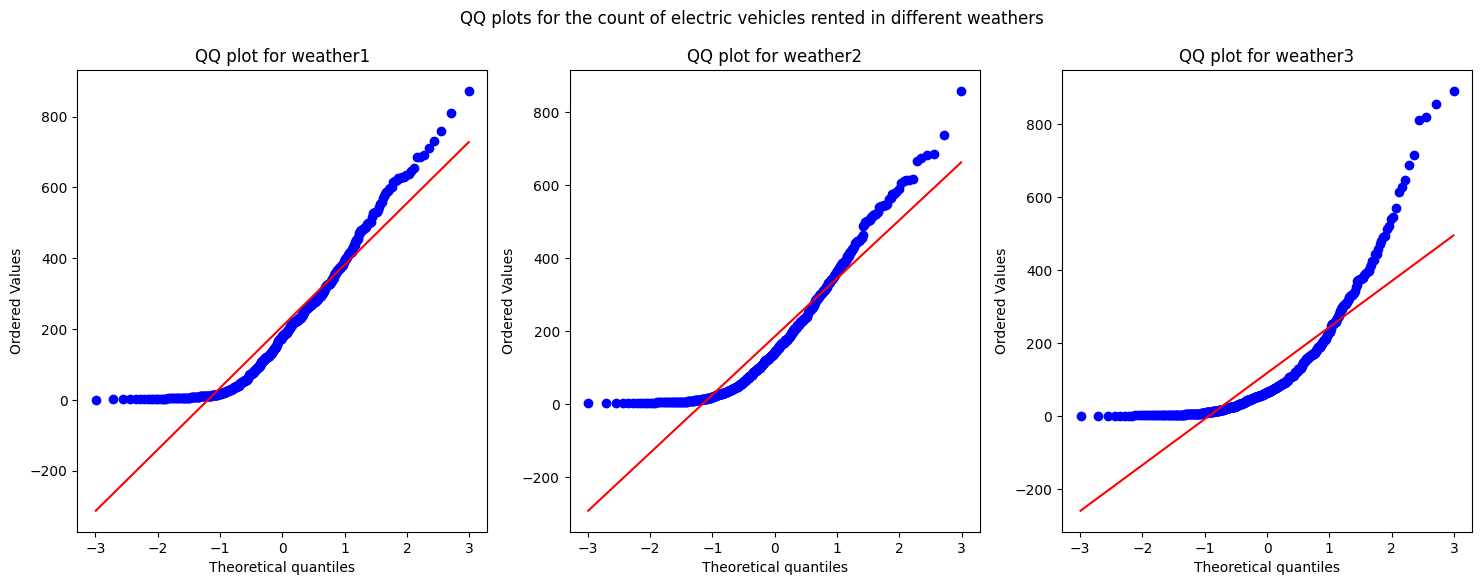

In [110]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

Applying Shapiro-Wilk test for normality
 H0: The sample follows normal distribution
 Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [111]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.249149051707323e-18
The sample does not follow normal distribution


In [112]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.047573454047981e-19
The sample does not follow normal distribution


In [113]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.8743358219210573e-26
The sample does not follow normal distribution


Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

In [114]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.266562211181419e-28
The sample does not follow normal distribution


In [115]:
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9219748327822736e-19
The sample does not follow normal distribution


In [116]:
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4137293646854232e-06
The sample does not follow normal distribution


levene Test

In [142]:
test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.5061821154894239e-15
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [146]:
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1, df_weather2, df_weather3)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = [1.36471292e+01 3.87838808e+01 5.37649760e+00 1.56915686e+01
 1.08840000e+04 3.70017441e+01 4.14298489e+01 1.83168690e+03
 2.80380482e+01 2.84639685e+02 1.73745440e+02 2.04955668e+02
 7.08445555e+01]
p value = [1.08783632e-03 3.78605818e-09 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45
 4.13333147e-16]


 number of cycles rented is similar or different in different season ?

In [126]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [127]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

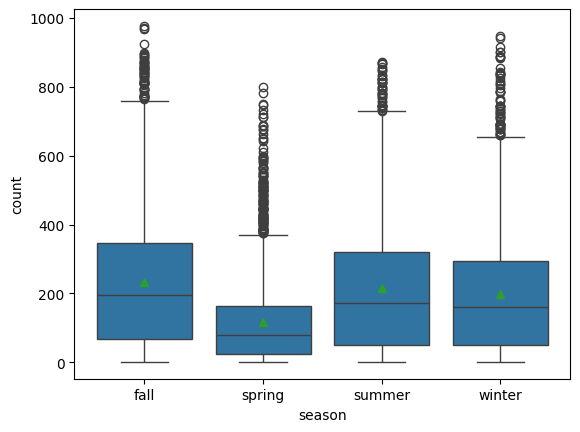

In [128]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

STEP-2 : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

STEP-3: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB/MSW

Under H0, the test statistic should follow F-Distribution.

STEP-4: Decide the kind of test.

We will be performing right tailed f-test

STEP-5: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

µ1 = µ2 = µ3 = ..... = µk

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other

[]

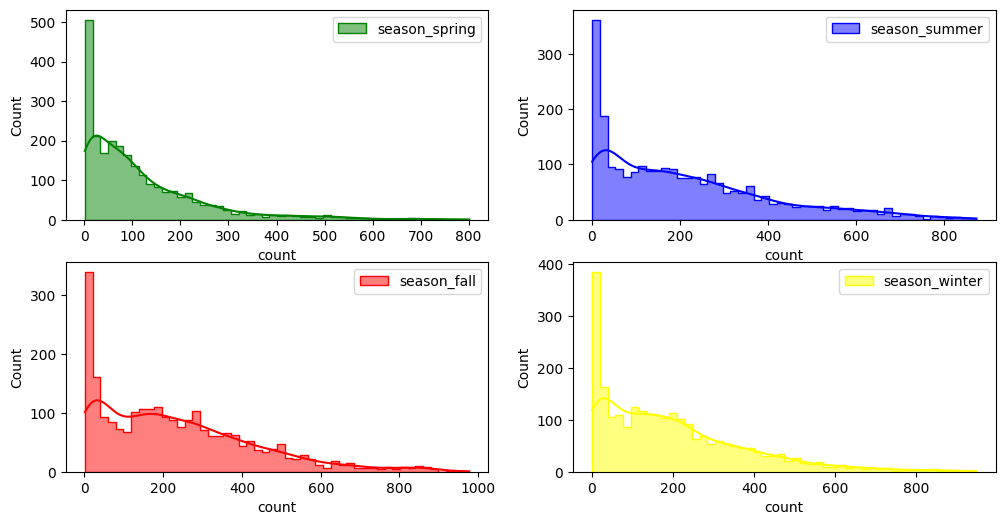

In [129]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

Distribution check using QQ Plot



[]

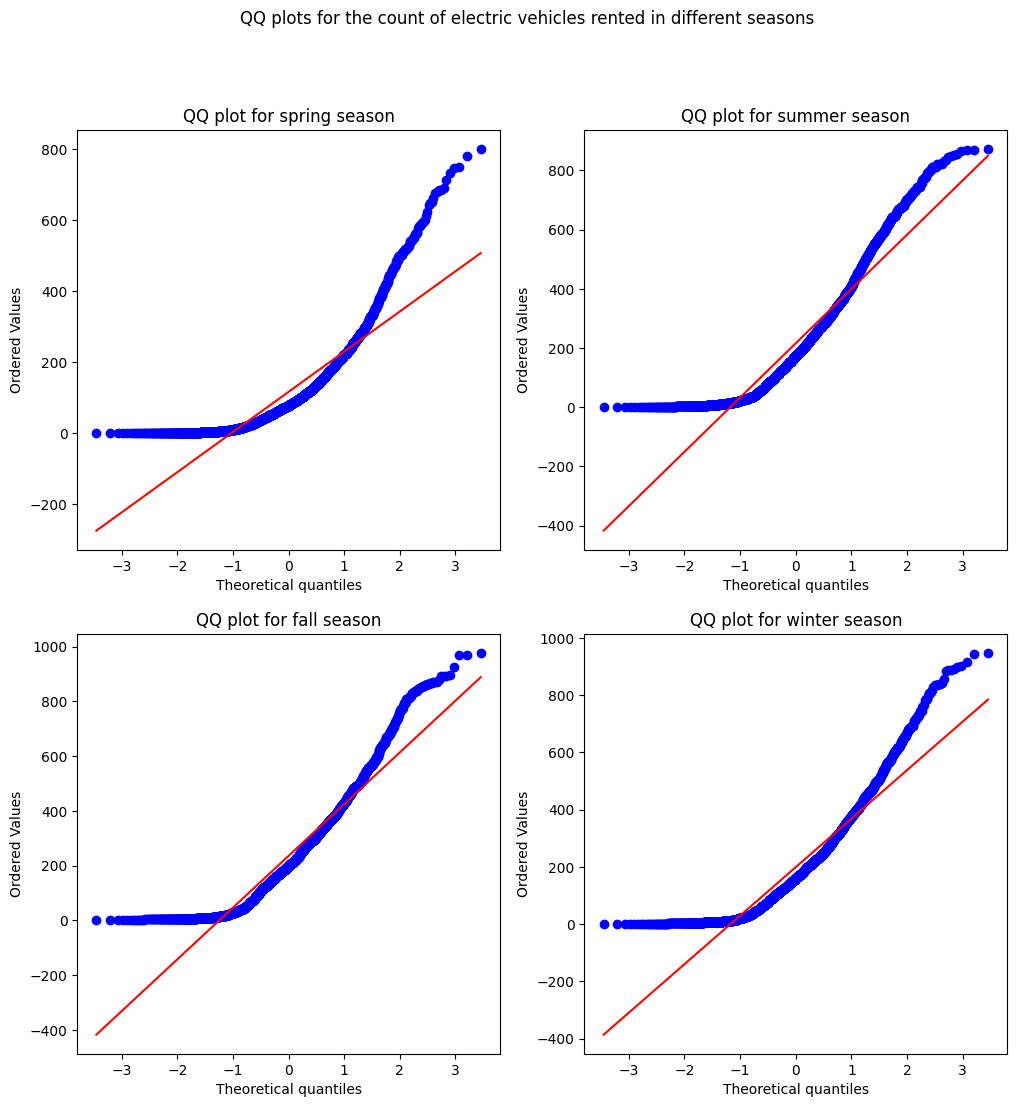

In [130]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

Applying Shapiro-Wilk test for normality
H0 : The sample follows normal distribution
 Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

In [132]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6508362017618003e-37
The sample does not follow normal distribution


In [131]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.1152475929838815e-35
The sample does not follow normal distribution


In [133]:
transformed_df_season_spring = spy.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')



p-value 6.527788448190824e-17
The sample does not follow normal distribution


In [134]:
transformed_df_season_summer = spy.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.246436283807887e-21
The sample does not follow normal distribution


Homogeneity of Variances using Levene's test



In [135]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 6.321024464564143e-110
The samples do not have  Homogenous Variance


In [136]:
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


In [152]:
alpha = 0.05
p_value = 2.479008372608633e-151
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


[]

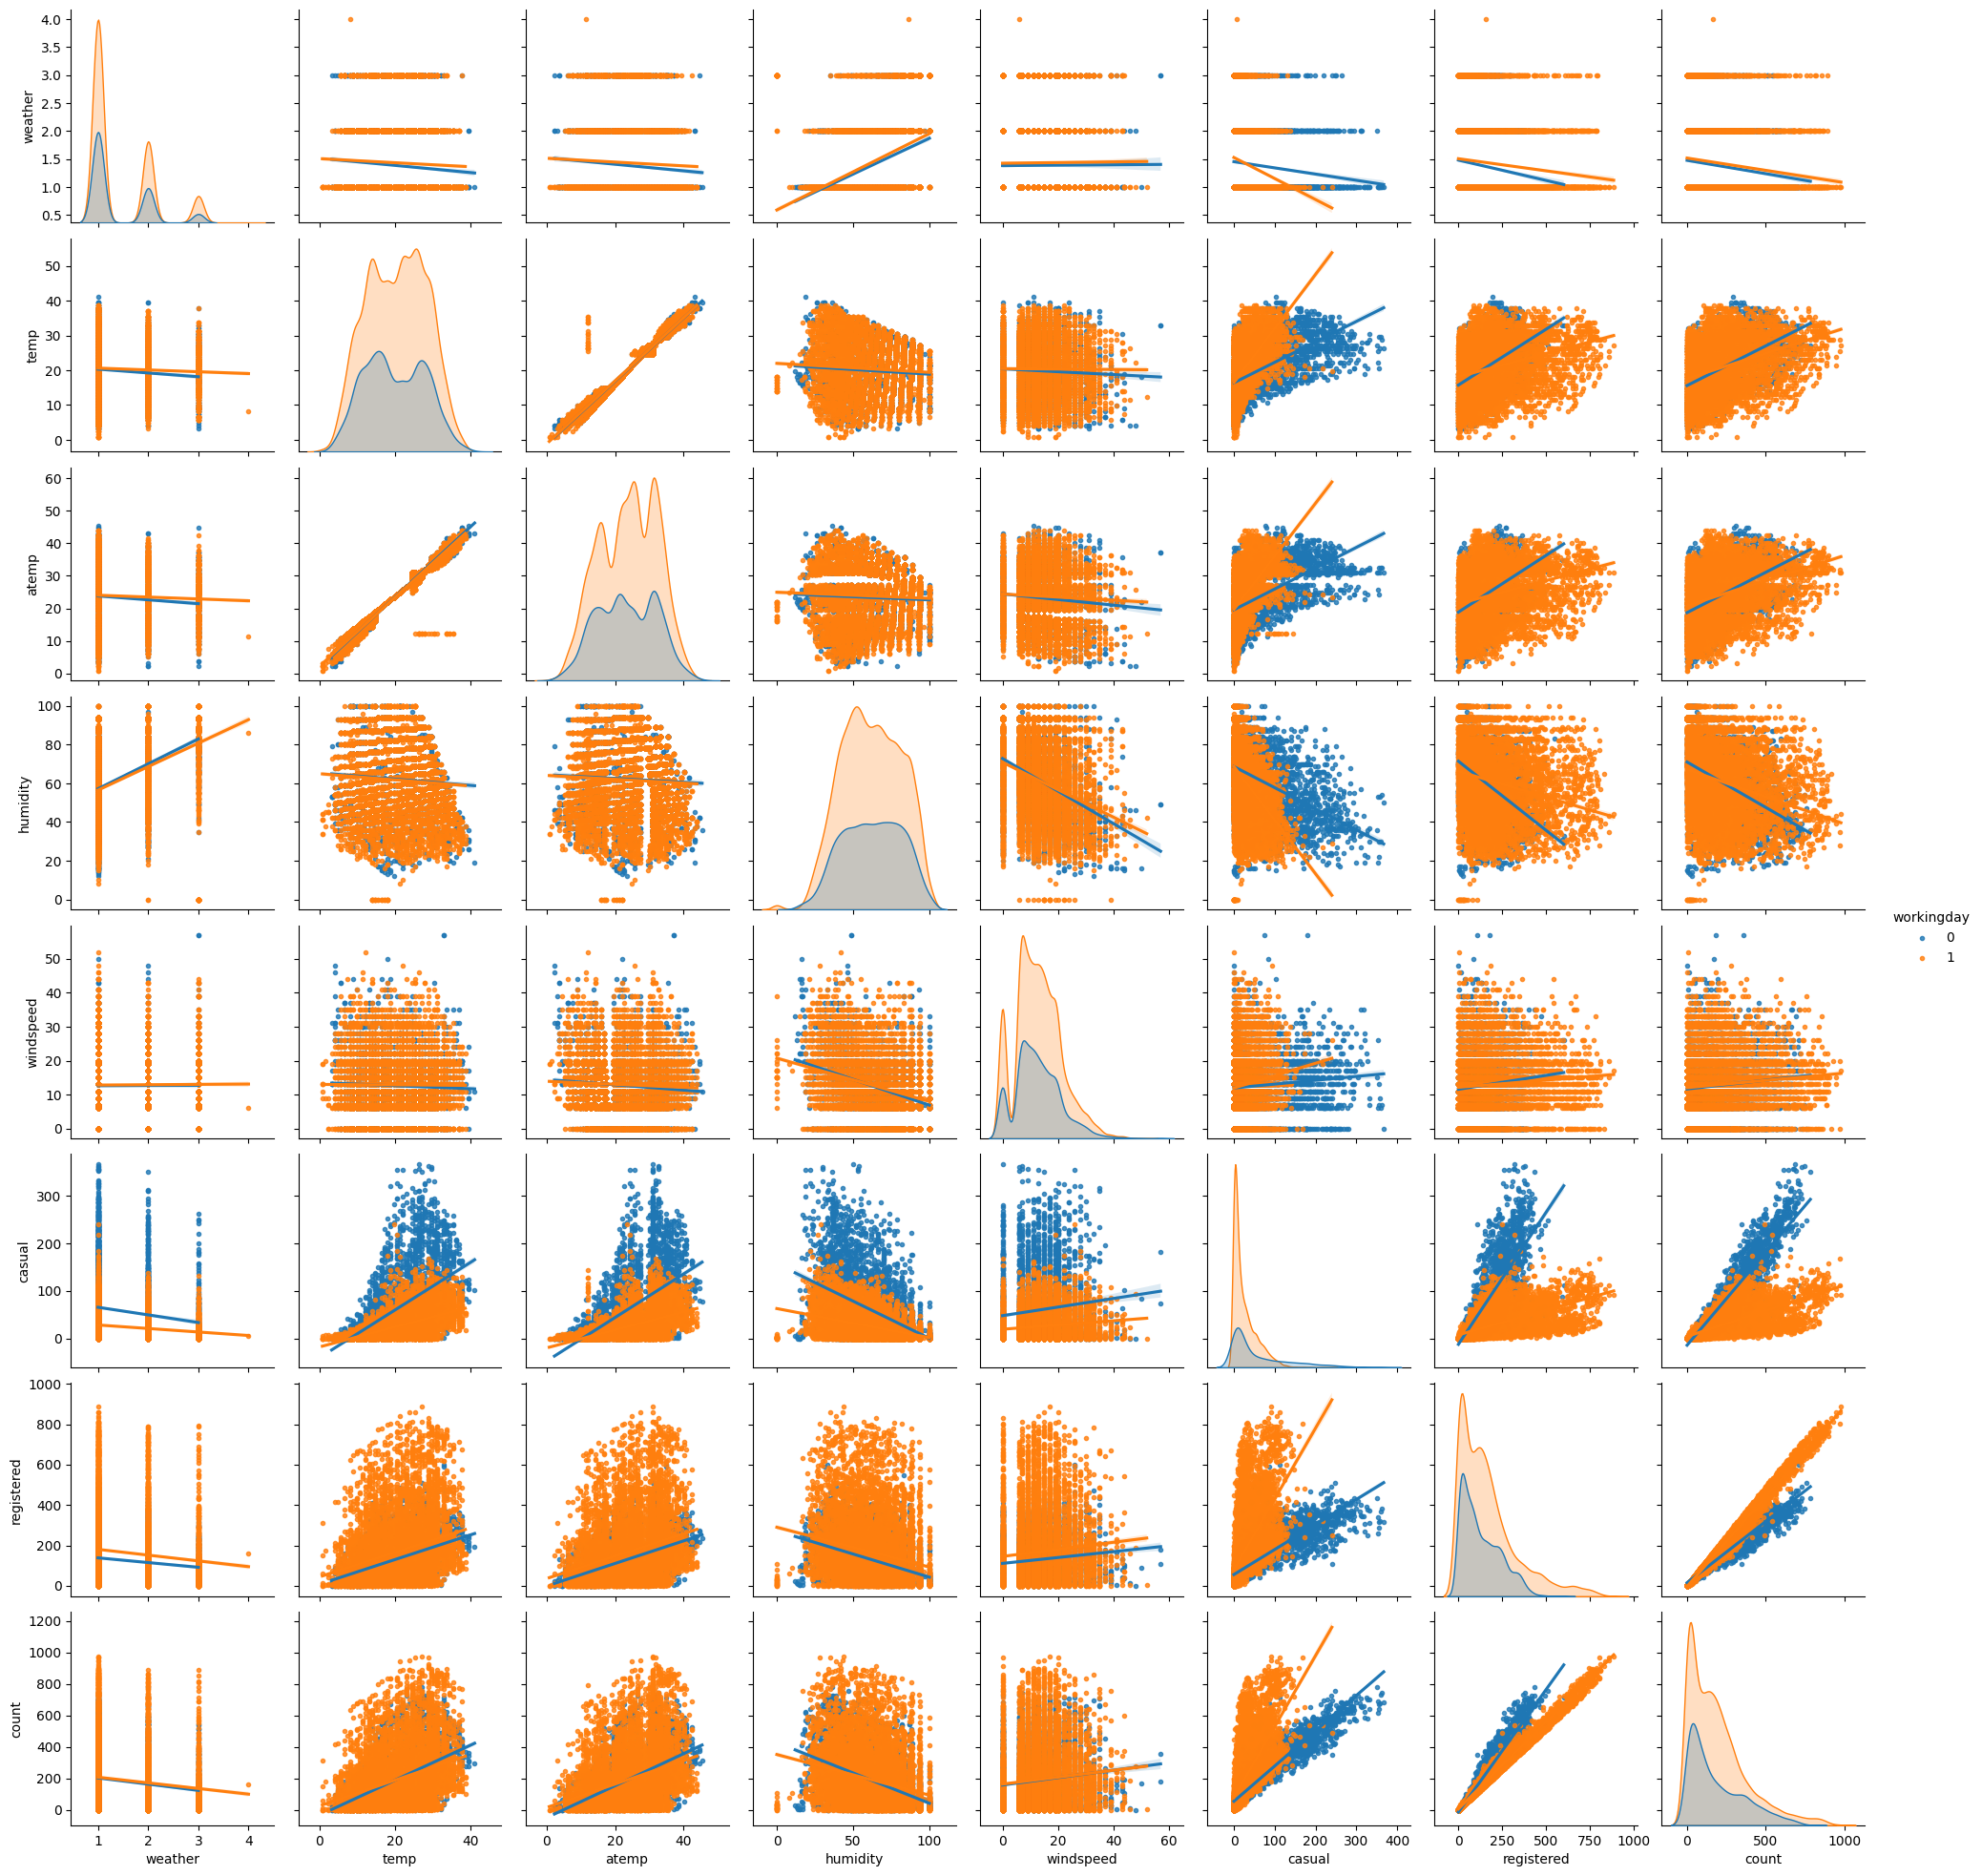

In [153]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [155]:
corr_data = df.corr()
corr_data

<ipython-input-155-f9b45ce29f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


,weather,temp,atemp,humidity,windspeed,casual,registered,count
weather,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


[]

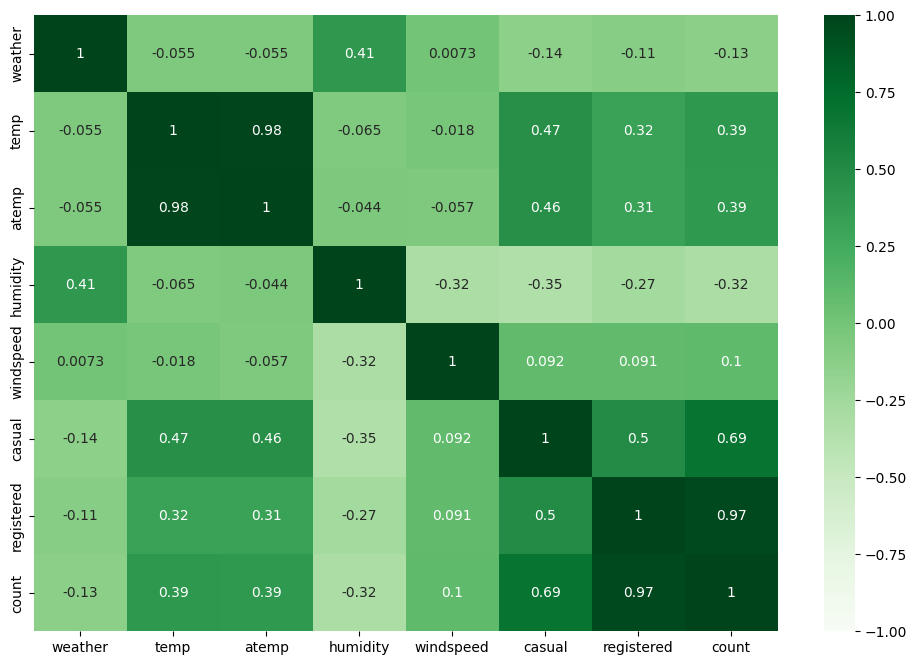

In [156]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

Insights
The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
Out of every 100 users, around 19 are casual users and 81 are registered users.
The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
More than 80 % of the time, the temperature is less than 28 degrees celcius.
More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
More than 85 % of the total, windspeed data has a value of less than 20.
The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
The hourly total number of rental bikes is statistically different for different weathers.
There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
The hourly total number of rental bikes is statistically different for different seasons.
Recommendations
Seasonal Marketing: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

Time-based Pricing: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

Weather-based Promotions: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

User Segmentation: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

Optimize Inventory: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

Improve Weather Data Collection: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

Customer Comfort: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

Collaborations with Weather Services: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

Seasonal Bike Maintenance: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

Customer Feedback and Reviews: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

Social Media Marketing: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

Special Occasion Discounts: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.